In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
# dropping unnecessary columns
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [6]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [ ]:
# checking null values
df.isna().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

## Visualization

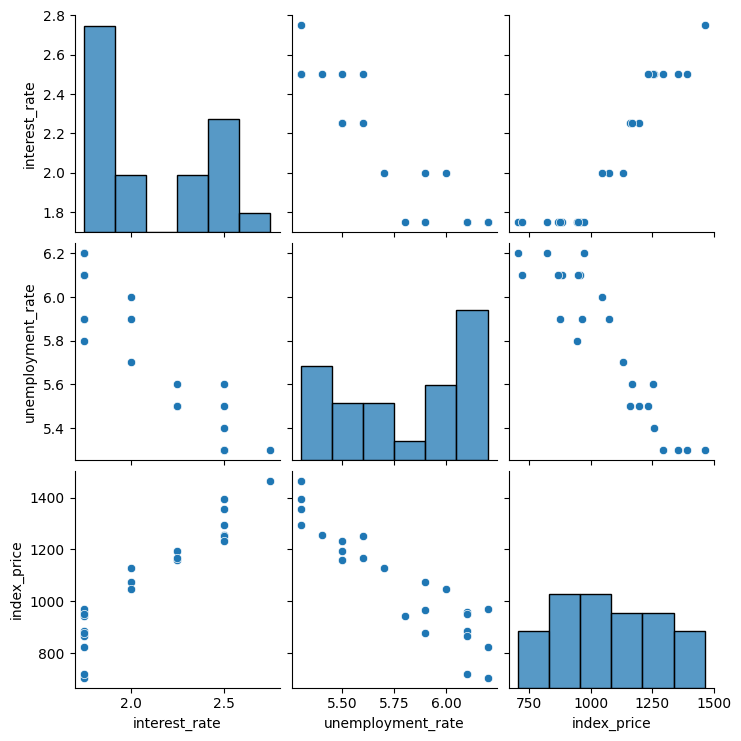

In [8]:
import seaborn as sns
sns.pairplot(df)

In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment_rate')

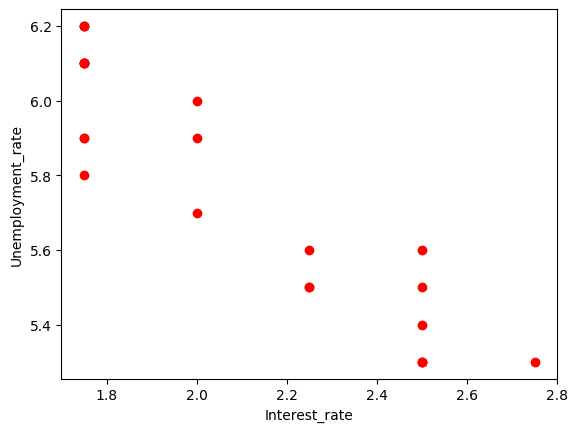

In [10]:
plt.scatter(x=df['interest_rate'],y=df['unemployment_rate'],color='r')
plt.xlabel("Interest_rate")
plt.ylabel("Unemployment_rate")

In [12]:
# Independent and dependent features
X=df[['interest_rate','unemployment_rate']]
y=df['index_price']
X,y

(    interest_rate  unemployment_rate
 0            2.75                5.3
 1            2.50                5.3
 2            2.50                5.3
 3            2.50                5.3
 4            2.50                5.4
 5            2.50                5.6
 6            2.50                5.5
 7            2.25                5.5
 8            2.25                5.5
 9            2.25                5.6
 10           2.00                5.7
 11           2.00                5.9
 12           2.00                6.0
 13           1.75                5.9
 14           1.75                5.8
 15           1.75                6.1
 16           1.75                6.2
 17           1.75                6.1
 18           1.75                6.1
 19           1.75                6.1
 20           1.75                5.9
 21           1.75                6.2
 22           1.75                6.2
 23           1.75                6.1,
 0     1464
 1     1394
 2     1357
 3     1293
 

In [13]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

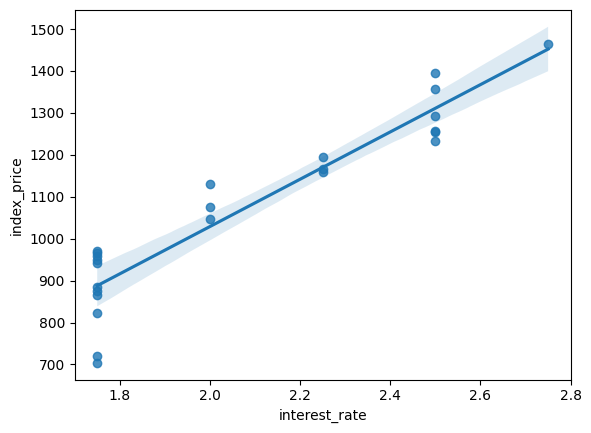

In [15]:
sns.regplot(data=df,x='interest_rate',y='index_price')

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

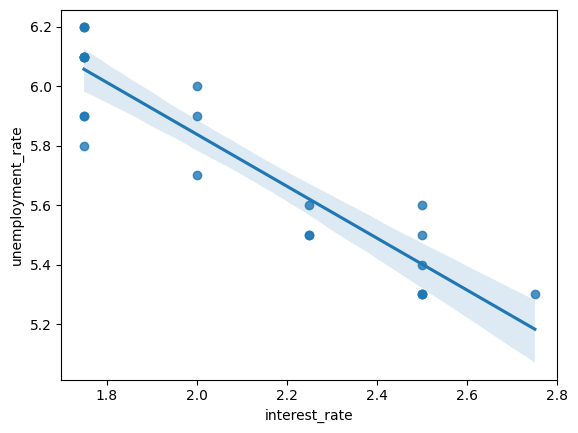

In [ ]:
sns.regplot(data=df,x='interest_rate',y='unemployment_rate')

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

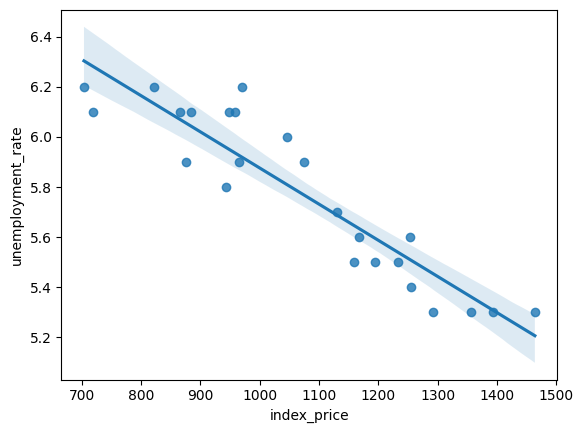

In [17]:
sns.regplot(data=df,x='index_price',y='unemployment_rate')

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [19]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [21]:
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [22]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [23]:
regression.fit(X_train,y_train)

LinearRegression()

In [44]:
print("Coefficint or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficint or slope: [  88.27275507 -116.25716066]
Intercept: 1053.4444444444443


In [24]:
# Cross Validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X,y,scoring='neg_mean_squared_error',cv=3)

In [25]:
validation_score

array([ -2618.85404734,  -4597.45700504, -15040.68256345])

In [26]:
np.mean(validation_score)

-7418.997871943825

In [29]:
y_pred=regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [ ]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [31]:
mse,mae,rmse

(5793.76288771258, 59.93578152323554, 76.11677139574813)

In [32]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.8278978091457142

In [33]:
adjusted_score= 1 - ((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
adjusted_score

0.713163015242857

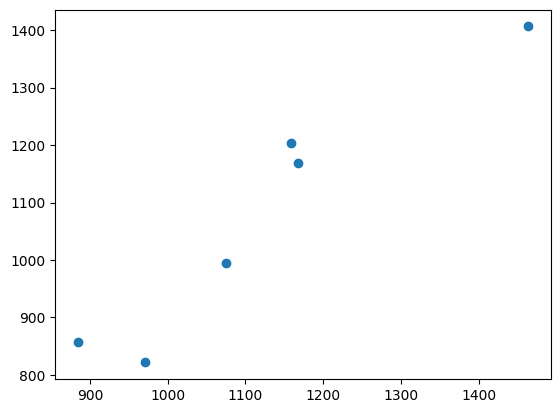

In [34]:
plt.scatter(y_test,y_pred)

In [36]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


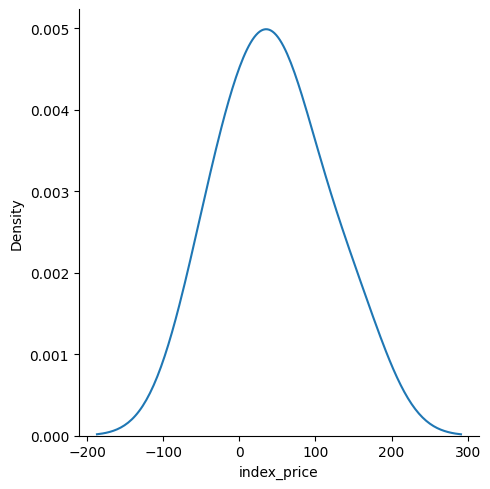

In [37]:
sns.displot(residuals,kind='kde')

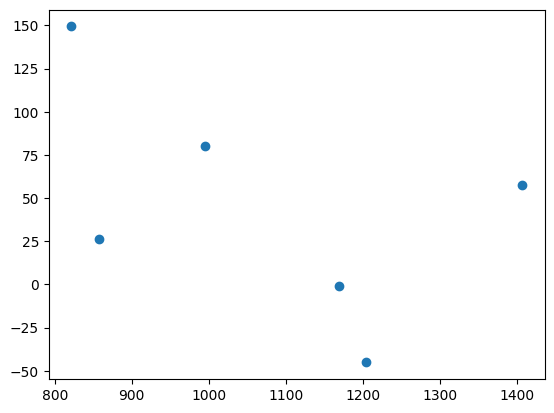

In [ ]:
plt.scatter(y_pred,residuals)
# uniformly distributed

# OLS

In [40]:
import statsmodels.api as sm

In [41]:
model=sm.OLS(y_train,X_train).fit()

In [42]:
prediction=model.predict(X_test)
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [43]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 16 May 2025   Prob (F-statistic):                       0.754
Time:                        13:28:41   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\KIIT0001\Desktop\DESKTOP_OWN\CODING\venv\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [46]:
# predicting for new data
regression.predict(scaler.transform([[2.675,5.75]]))

c:\Users\KIIT0001\Desktop\DESKTOP_OWN\CODING\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1224.72502511])